In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE, RFECV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import StratifiedKFold, cross_val_score
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import datasets, linear_model
from sklearn.linear_model import LogisticRegressionCV

In [18]:
#load_path = 'D:\EECE499\Features\\'
load_path = '..\..\..\..\\'

In [19]:
Features = pd.read_excel(load_path + 'Features.xlsx')

In [20]:
def sort_list(list1, list2): 
    zipped_pairs = zip(list2, list1) 
    z = [x for _, x in sorted(zipped_pairs)] 
    return z

In [21]:
X = Features.iloc[:, :-5].values
y = Features.iloc[:, -1].values

In [22]:
standard_scaler = StandardScaler()
X_scaled = standard_scaler.fit_transform(X)

In [23]:
classifier = LogisticRegression(random_state = 42, solver='lbfgs', max_iter=1000, multi_class='ovr')

In [24]:
accuracies = cross_val_score(classifier, X_scaled, y, cv=10, verbose=1, scoring='accuracy')
rmses = cross_val_score(classifier, X_scaled, y, cv=10, verbose=1, scoring='neg_mean_squared_error')
maes = cross_val_score(classifier, X_scaled, y, cv=10, verbose=1, scoring='neg_mean_absolute_error')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    4.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.2s finished


In [25]:
print(accuracies.mean(), -maes.mean(), np.sqrt(-rmses.mean()))

0.16748930616178379 1.9765135186360954 2.4779211768508262


In [26]:
classifier.fit(X, y)

C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [27]:
y_pred = classifier.predict(X)

In [28]:
confusion_mtrx = confusion_matrix(y, y_pred)

In [29]:
confusion_mtrx

array([[ 7,  4,  9,  9,  4,  4,  1],
       [ 2, 28, 19,  6,  8, 15,  1],
       [ 0, 13, 58, 16, 18, 13,  6],
       [ 1,  7, 30, 33, 12, 13,  3],
       [ 1,  7, 25, 12, 30, 19,  5],
       [ 1, 12, 24,  8, 14, 44,  5],
       [ 0,  3, 16,  5,  5,  9, 18]], dtype=int64)

In [30]:
accuracy = accuracy_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = mean_squared_error(y, y_pred)

In [31]:
print(accuracy, mae, rmse)

0.3615257048092869 1.3665008291873963 3.804311774461028


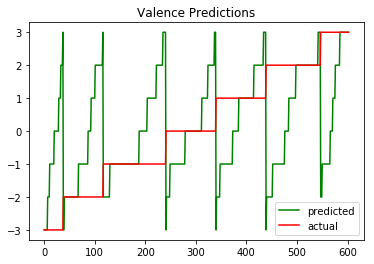

In [34]:
y_new = sort_list(y_pred, y)

plt.title('Valence Predictions')
plt.plot(y_new, color='green')
plt.plot(sorted(y), color='red')
plt.legend(['predicted', 'actual'])

plt.savefig('valence.eps', format='eps', dpi=1000)
plt.savefig('valence.png', format='png', dpi=1000)

plt.show()